In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#Adding this column so I can seperate data before modeling
train["is_train"] = 1
test["is_train"] = 0

#Adding this column for easier concat
test["SalePrice"] = None  

df = pd.concat([train, test], axis=0, ignore_index=True)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,is_train
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2006,WD,Normal,None,0
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2006,WD,Abnorml,None,0
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2006,WD,Abnorml,None,0
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,Shed,700,7,2006,WD,Normal,None,0


In [5]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice         object
is_train           int64
Length: 82, dtype: object

In [6]:
df.SalePrice = df.SalePrice.astype(float)

# Missing Values

In [8]:
def null_values(df):
    missing_values = df.isnull().sum()
    cols = missing_values[missing_values > 0].sort_values(ascending=False).index
    null_data = pd.concat([df.isnull().sum(axis=0),
                            (df.isnull().sum(axis=0)/len(df)).sort_values(ascending=False),
                            df.loc[:, df.columns.isin(list(cols))].dtypes], axis=1)
    null_data = null_data.rename(columns = {0: 'Number',
                                            1:'%',
                                            2: 'type'}).sort_values(ascending=False, by = '%')
    null_data = null_data[null_data['Number']!=0]
    return null_data

null_values(df)

,Number,%,type
PoolQC,2909,0.996574,object
MiscFeature,2814,0.964029,object
Alley,2721,0.932169,object
Fence,2348,0.804385,object
MasVnrType,1766,0.605002,object
SalePrice,1459,0.499829,float64
FireplaceQu,1420,0.486468,object
LotFrontage,486,0.166495,float64
GarageCond,159,0.054471,object
GarageFinish,159,0.054471,object


## Columns with more than 90% of missing values

### Pool columns

Since there is 99.66% (2909 values) of houses without value for PoolQC, and there is another column 'PoolArea', we need to check it first

In [12]:
df.PoolArea.value_counts()[0]

2906

In [13]:
df[df.PoolQC.isnull()].PoolArea.value_counts()

PoolArea
0      2906
368       1
444       1
561       1
Name: count, dtype: int64

For 2906 observation missing value for PoolQC means there is no pool, but 3 observations has value for PoolArea so there is some mistake. 

Let's see if there is any usage of this information for sales. Let's see if houses with pool have diffrent price

In [16]:
df[df.PoolArea !=0][['PoolArea','SalePrice']]

,PoolArea,SalePrice
197,512,235000.0
810,648,181000.0
1170,576,171000.0
1182,555,745000.0
1298,480,160000.0
1386,519,250000.0
1423,738,274970.0
1974,144,NaN
2420,368,NaN
2503,444,NaN


There is no useful information here, because it's less that 0.4% houses with pool. So we'll remove both of this columns

In [18]:
df.drop(columns=['PoolQC','PoolArea'], inplace=True)

### Alley and MiscFeature columns

There are too much missing values for these columns, which means that 96.4% houses have no alley and 93.21% houses have no features that isn't covered in other categories. So we can delete these columns, and also the column MiscVal which says $value of miscellaneous feature, since we wouldn't have MiscFeature

In [21]:
df.drop(columns=['Alley','MiscFeature','MiscVal'], inplace=True)

## Filling missing values

### Columns where NaN means that there is no object

There is something strange here, we have 159 missing values for 4 columns about garage, and 157 missing values for GarageType. Missing value here indicates that there is no garage, so 2 values are strange, lets see these values

In [25]:
df[df.GarageQual.isnull() & df.GarageType.notnull()].GarageType

2126    Detchd
2576    Detchd
Name: GarageType, dtype: object

Both of this values are GarageType Detchd (Detached from home). Let's see is there more of this category of GarageType

In [27]:
df.GarageType.value_counts()

GarageType
Attchd     1723
Detchd      779
BuiltIn     186
Basment      36
2Types       23
CarPort      15
Name: count, dtype: int64

There is 779 values of Detchd. So It might be an error with these two values, It can be that there is no garage here, so the error is in typing, or that values for other columns wasn't typed. Since I don't want to delete this rows, I'm going to change these values for GarageType to None in accordance with other Garage columns. The rest off missing values will be handled later with other Garage columns.

In [29]:
df.loc[df.GarageQual.isnull() & df.GarageType.notnull(), "GarageType"] = "None"

Also there are strange thing with MasVnrType (Masonry veneer type) and VasVnrArea( Masonry veneer area in square feet). There are 1766 missing values for MasVnrType and only 23 missing values for MasVnrArea. So let's check it:

In [31]:
# of MasVnrType missing = 1766
#of MasVnrArea missing = 23
#Difference is 1743
len(df[df.MasVnrType.isnull() & df.MasVnrArea.isnull()])

23

All missing MasVnrArea missing also MasVnrType. Now let's see cases when missing MasVnrType and having MasVnrArea

In [33]:
df[df.MasVnrType.isnull()& df.MasVnrArea.notnull()]['MasVnrArea'].value_counts()

MasVnrArea
0.0      1735
1.0         3
288.0       1
344.0       1
312.0       1
285.0       1
198.0       1
Name: count, dtype: int64

So for 1735 rows we have matching missing values and zero. But 8 have no zero values, so we have to correct this - change them into zeros

In [35]:
df.loc[df.MasVnrType.isnull()& df.MasVnrArea.notnull(),'MasVnrArea'] = 0

For column Saletype, since there is option 'Other', let's chane missin value to that

In [37]:
df.loc[df['SaleType'].isnull(),'SaleType'] = 'Other'

There are columns where we fill NaN to 'None' for categorical values, then with 0 where is there indication of non having somethnig, median for continous columns and mode for discrete numeric columns

In [39]:
cols_fill_none = ['Fence','MasVnrType', 'FireplaceQu','GarageCond','GarageFinish','GarageQual','GarageType',
                  'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType2','BsmtFinType1']
cols_fill_zero = ['GarageYrBlt','MasVnrArea','BsmtFullBath','BsmtHalfBath','BsmtFinSF1',
                  'GarageCars','GarageArea','TotalBsmtSF','BsmtUnfSF','BsmtUnfSF','BsmtFinSF2']
cols_fill_median = ['LotFrontage']
cols_fill_mode = ['MSZoning','Functional','Utilities','Electrical','Exterior2nd','Exterior1st','KitchenQual']

In [40]:
for col in cols_fill_none:
    df[col] = df[col].fillna('None')

for col in cols_fill_zero:
    df[col] = df[col].fillna(0)

for col in cols_fill_median:
    df[col] = df[col].fillna(df[col].median())

for col in cols_fill_mode:
    df[col] = df[col].fillna(df[col].mode()[0])

Checking to see if missing values are handled:

In [42]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values >0].sort_values(ascending=False)
missing_values

SalePrice    1459
dtype: int64

# Outliers

We're going to look up for outliers on numerical continuous data on training dataset

In [45]:
num_continuous = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
                  '2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
                  '3SsnPorch','ScreenPorch','SalePrice']

In [46]:
#We need train dataset and we gonna find outlier here
df_train = df[df.is_train == 1].copy()

In [47]:
# First let's check for duplicates 
df_train.duplicated().sum()

0

Let's see boxplots for num_continuous columns

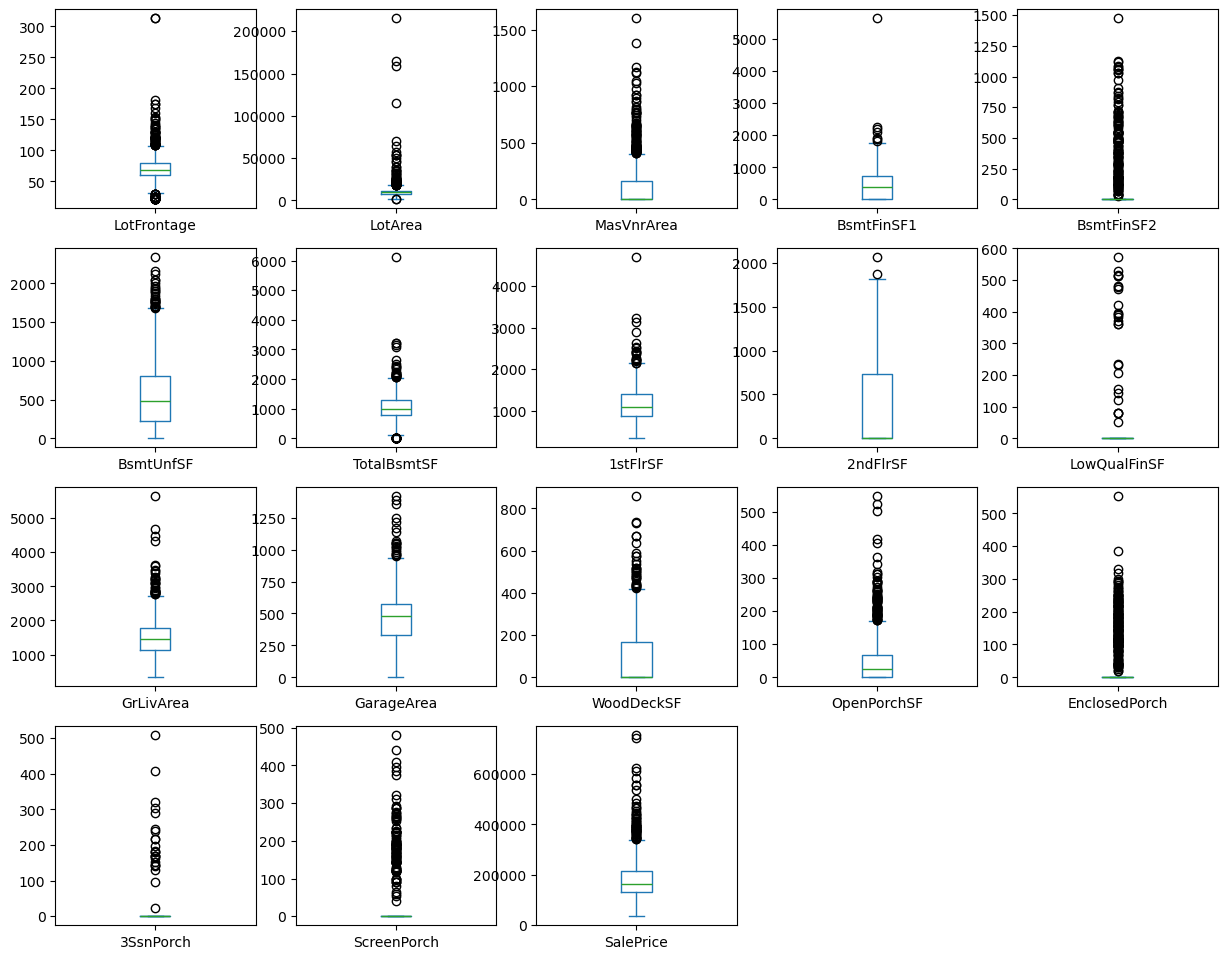

In [49]:
df_train[num_continuous].plot(kind='box', subplots=True, layout=(5,5), figsize=(15,15))
plt.show()

Now let's see distributions

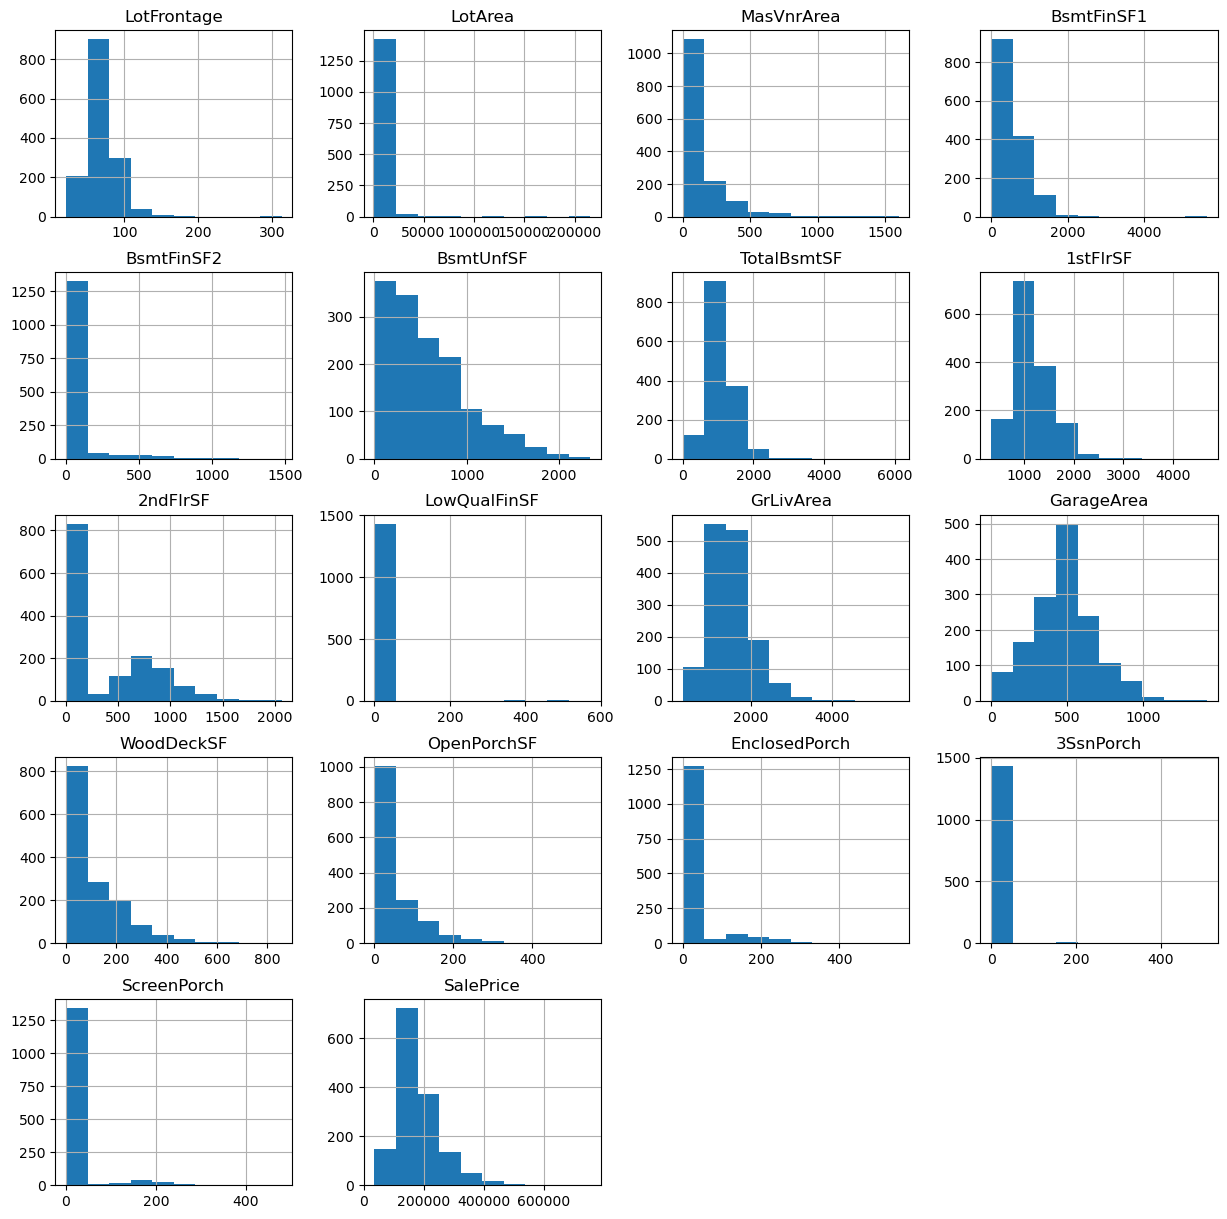

In [51]:
df_train[num_continuous].hist(figsize=(15,15))
plt.show()

Let's look individually in columns

## LotFrontage, Lot Area column

In [54]:
df_train.LotFrontage.sort_values(ascending=False)

1298    313.0
934     313.0
1127    182.0
231     174.0
197     174.0
        ...  
614      21.0
1038     21.0
1039     21.0
655      21.0
649      21.0
Name: LotFrontage, Length: 1460, dtype: float64

There is one value that is far from the others. Let's see some statistic for this column

In [56]:
df_train.LotFrontage.describe()

count    1460.000000
mean       69.686301
std        22.037950
min        21.000000
25%        60.000000
50%        68.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [57]:
#Lets look at these rows with LotFrontage of 313
df_train[df_train.LotFrontage == 313][['LotArea','LotShape']]

,LotArea,LotShape
934,27650,IR2
1298,63887,IR3


Let's see other rows with this values of LotShape and LotArea

In [59]:
df_train.LotArea.sort_values(ascending=False)

313     215245
335     164660
249     159000
706     115149
451      70761
         ...  
1038      1533
489       1526
614       1491
1039      1477
956       1300
Name: LotArea, Length: 1460, dtype: int64

In [60]:
df_train.LotShape.value_counts()

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64

In [61]:
df_train[df_train['LotShape']=='IR3'][['LotFrontage','LotArea']]

,LotFrontage,LotArea
264,30.0,5232
301,66.0,16226
313,150.0,215245
1006,68.0,12155
1107,168.0,23257
1127,182.0,14572
1260,68.0,24682
1298,313.0,63887
1348,68.0,16196
1430,60.0,21930


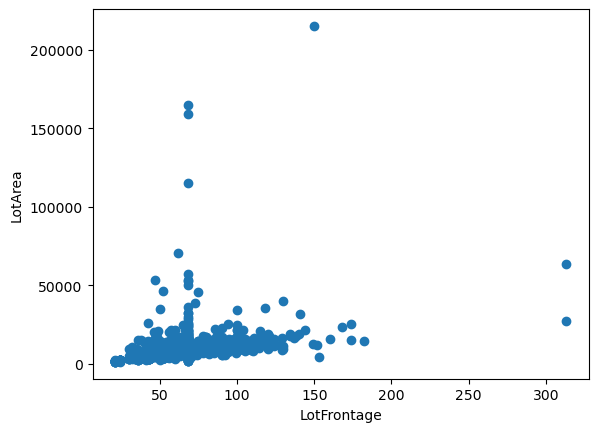

In [62]:
plt.scatter(df_train.LotFrontage, df_train.LotArea)
plt.xlabel('LotFrontage')
plt.ylabel('LotArea')
plt.show()

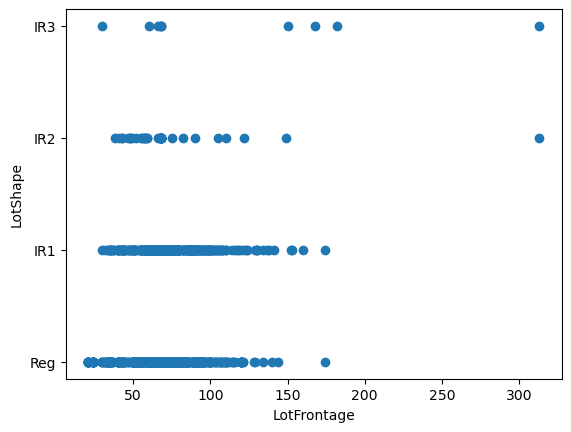

In [63]:
plt.scatter(df_train.LotFrontage, df_train.LotShape)
plt.xlabel('LotFrontage')
plt.ylabel('LotShape')
plt.show()

In [64]:
test[test['LotFrontage']==313]
#just checking if is this value in test dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,is_train,SalePrice


This two values are outliers, there are not making sense for data in comparion with columns that they are related to, so let's remove them 

In [66]:
df.drop(index = df[df.LotFrontage==313].index, inplace=True)
df_train.drop(index = df_train[df_train.LotFrontage ==313].index, inplace=True)

Let's see LotArea column

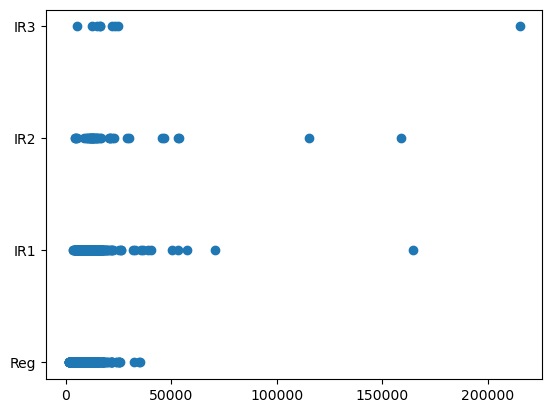

In [68]:
plt.scatter(df_train.LotArea, df_train.LotShape)
plt.show()

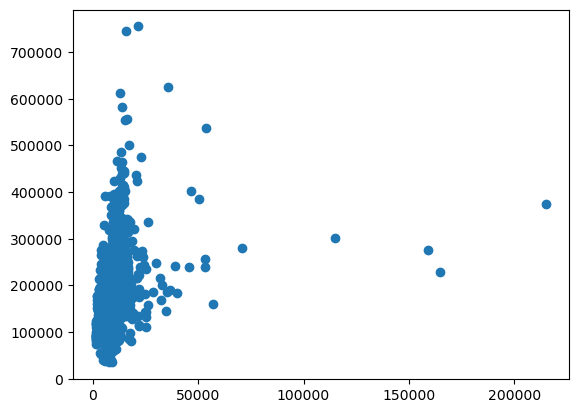

In [69]:
plt.scatter(df_train.LotArea, df_train.SalePrice)

For Lot Area we also have one outlier, LotArea > 200,000

In [71]:
df[df.LotArea > 200000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice,is_train
313,314,20,RL,150.0,215245,Pave,IR3,Low,AllPub,Inside,...,0,0,0,None,6,2009,WD,Normal,375000.0,1


In [72]:
df.drop(index = df[df.LotArea > 200000].index, inplace=True)
df_train.drop(index = df_train[df_train.LotArea > 200000].index,inplace=True)

## MsnVnrArea

In [74]:
df_train.MasVnrArea.sort_values(ascending=False)

297     1600.0
1169    1378.0
691     1170.0
115     1129.0
70      1115.0
         ...  
624        0.0
626        0.0
630        0.0
633        0.0
1459       0.0
Name: MasVnrArea, Length: 1457, dtype: float64

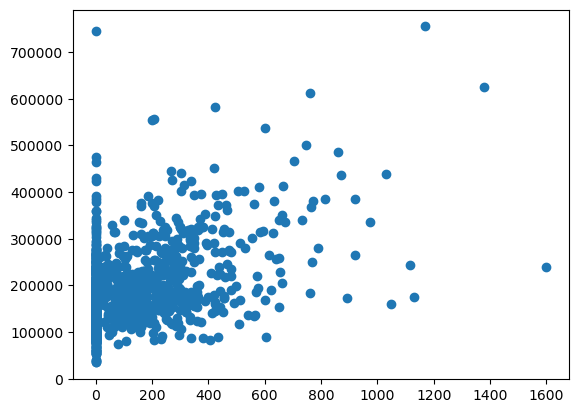

In [75]:
plt.scatter(df_train.MasVnrArea, df_train.SalePrice)
plt.show()

In [76]:
df_train[df_train.MasVnrArea == 1600]['MasVnrType']

297    BrkFace
Name: MasVnrType, dtype: object

This column is related to MasVnrType, so let's see a plot

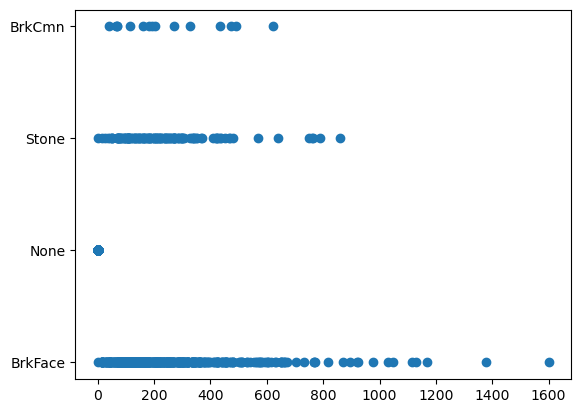

In [78]:
plt.scatter(df_train['MasVnrArea'],df_train['MasVnrType'])
plt.show()

It can be okay value, since its bigger values for MasVnrArea for this BrkFace type 

## Bsmt columns

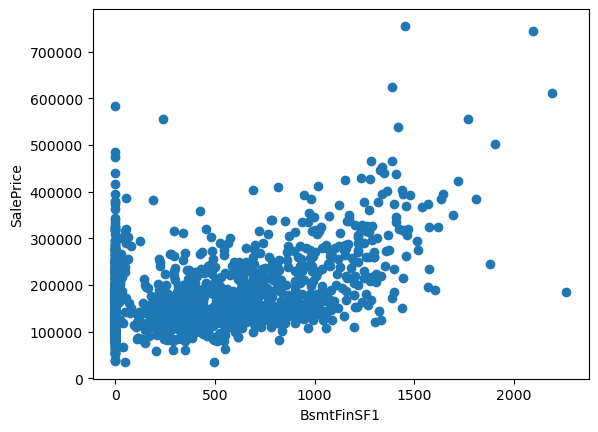

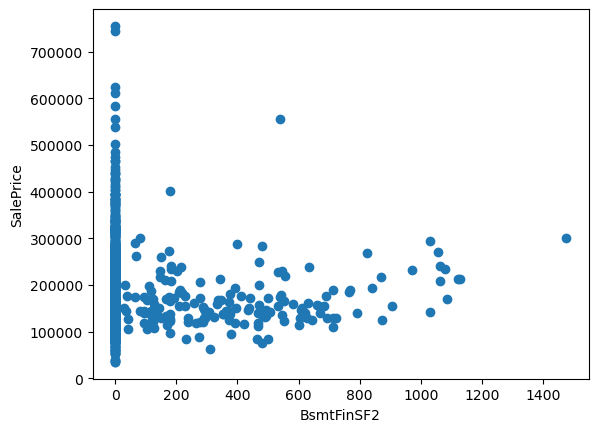

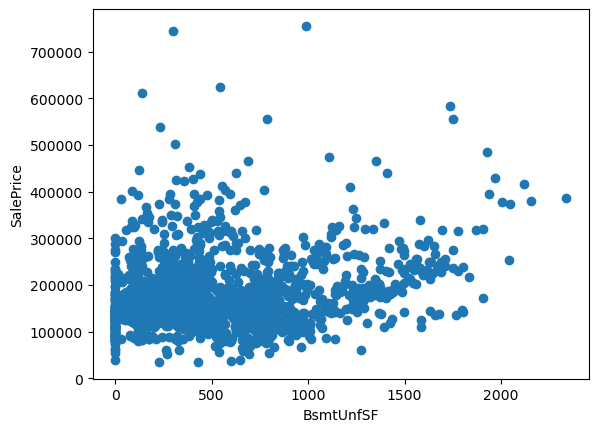

In [81]:
for col in ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF']:
    plt.scatter(df_train[col], df_train['SalePrice'])
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.show()

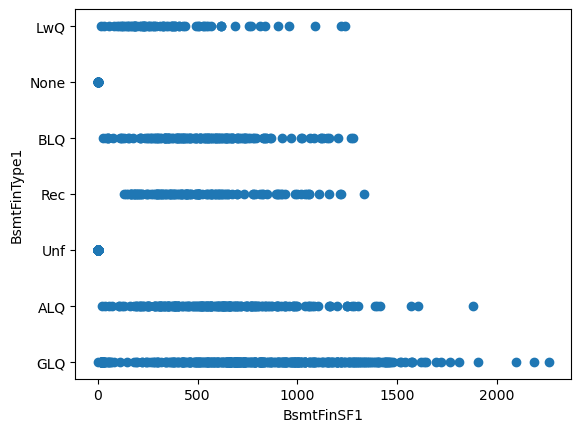

In [82]:
plt.scatter(df_train.BsmtFinSF1, df_train.BsmtFinType1)
plt.xlabel('BsmtFinSF1')
plt.ylabel('BsmtFinType1')
plt.show()

Everything looks okay

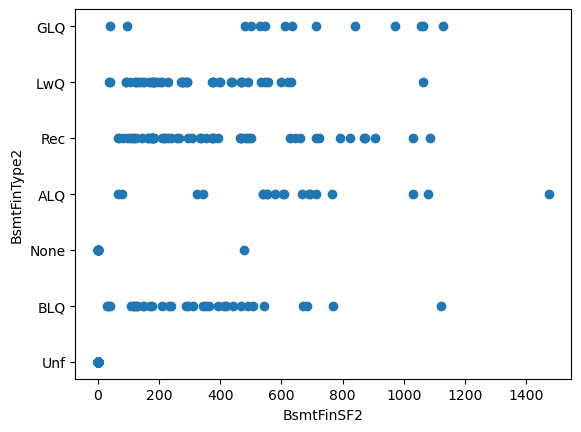

In [84]:
plt.scatter(df_train.BsmtFinSF2, df_train.BsmtFinType2)
plt.xlabel('BsmtFinSF2')
plt.ylabel('BsmtFinType2')
plt.show()

There is one values for ALQ that is atipical, let's see this type of bsmt plotted with SalePrice

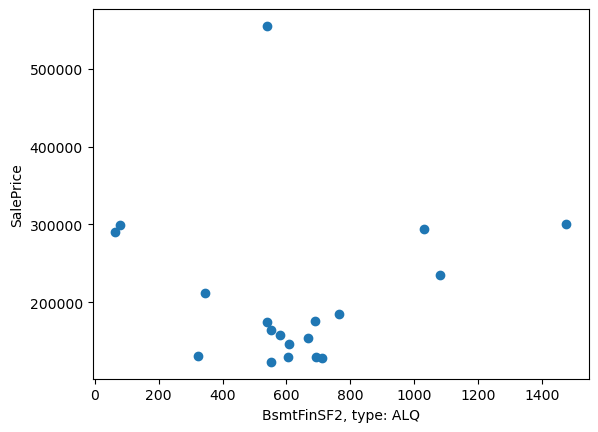

In [86]:
plt.scatter(df_train[df_train.BsmtFinType2 == 'ALQ']['BsmtFinSF2'],df_train[df_train.BsmtFinType2 == 'ALQ']['SalePrice'])
plt.xlabel('BsmtFinSF2, type: ALQ')
plt.ylabel('SalePrice')
plt.show()

In [87]:
df_train[df_train.SalePrice > 500000]['BsmtFinSF2']

178       0.0
440     539.0
691       0.0
769       0.0
803       0.0
898       0.0
1046      0.0
1169      0.0
1182      0.0
Name: BsmtFinSF2, dtype: float64

In [88]:
df[df.BsmtFinSF1 == 440]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice,is_train
1186,1187,190,RL,107.0,10615,Pave,IR1,Bnk,AllPub,Corner,...,0,0,0,None,8,2009,WD,Abnorml,95000.0,1


In [89]:
# We see that the value for BsmtFinSF2 > 1400 is okay, but value 440 it's not very tipicall for this type of Bsmt
df.drop(index = df[df.BsmtFinSF1 == 440].index, inplace=True)
df_train.drop(index= df_train[df_train.BsmtFinSF1 == 440].index, inplace=True)

BsmtUnfSF is okay

## FlrSF

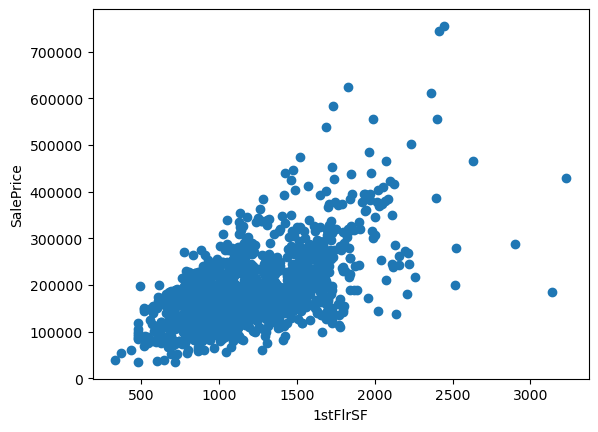

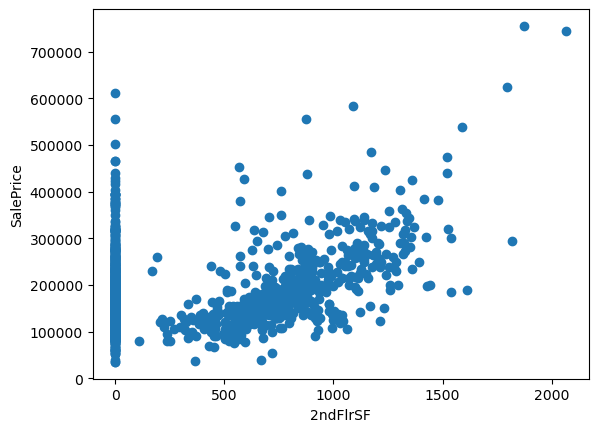

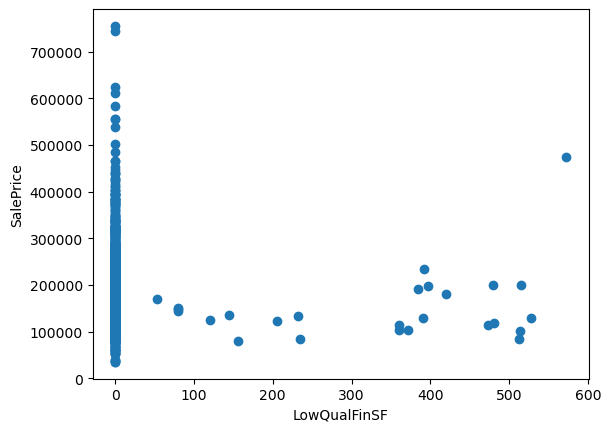

In [92]:
cols_flr = ['1stFlrSF','2ndFlrSF','LowQualFinSF']
for col in cols_flr:
    plt.scatter(df_train[col], df_train.SalePrice)
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.show()

In [93]:
df_train[(df_train.LowQualFinSF > 500) & (df_train.SalePrice > 400000)][['LowQualFinSF','1stFlrSF','2ndFlrSF','SalePrice']]

,LowQualFinSF,1stFlrSF,2ndFlrSF,SalePrice
185,572,1518,1518,475000.0


In [94]:
# Lets compaire some other obesrvation
df_train[(df_train.LowQualFinSF > 500)][['LowQualFinSF','1stFlrSF','2ndFlrSF','TotalBsmtSF','OverallQual','SalePrice']]

,LowQualFinSF,1stFlrSF,2ndFlrSF,TotalBsmtSF,OverallQual,SalePrice
88,513,1013,0,1013.0,3,85000.0
170,528,854,0,720.0,5,128500.0
185,572,1518,1518,1107.0,10,475000.0
635,515,1440,1440,1440.0,6,200000.0
1009,514,1008,0,1008.0,5,102000.0


It seems it's okay to keep this observation

## GrLivArea: Above grade (ground) living area square feet; 

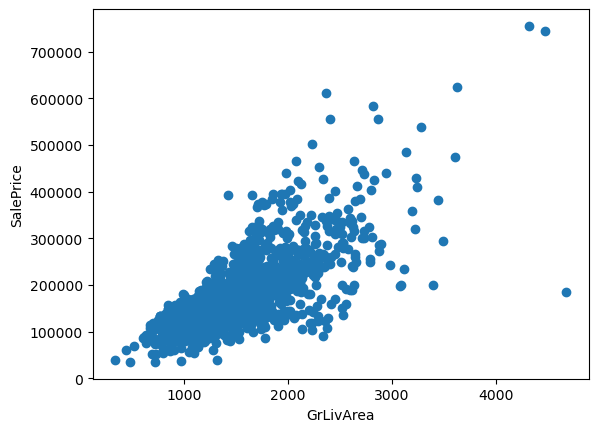

In [97]:
plt.scatter(df_train['GrLivArea'],df_train['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

There is one value that need to be check

In [99]:
df_train[(df_train['GrLivArea']> 4000)][['GrLivArea','SalePrice','OverallQual','YearBuilt','TotalBsmtSF','LotArea','LandContour','LotConfig']]

,GrLivArea,SalePrice,OverallQual,YearBuilt,TotalBsmtSF,LotArea,LandContour,LotConfig
523,4676,184750.0,10,2007,3138.0,40094,Bnk,Inside
691,4316,755000.0,10,1994,2444.0,21535,Lvl,Corner
1182,4476,745000.0,10,1996,2396.0,15623,Lvl,Corner


It looks okay to keep 523 observation

## Garage Area

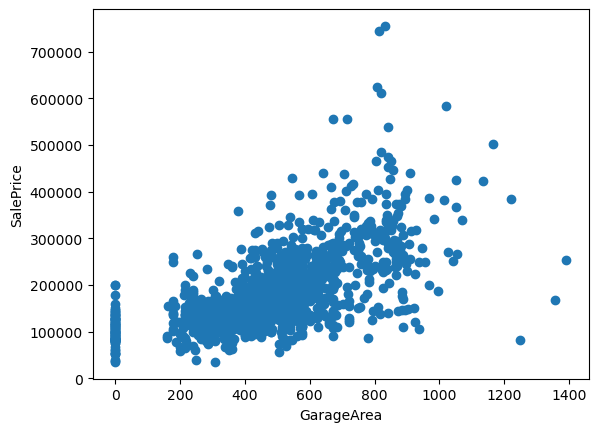

In [102]:
plt.scatter(df_train.GarageArea, df_train.SalePrice)
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.show()

In [103]:
df_train[(df_train['SalePrice'] > 700000) & (df_train['GarageArea'] > 600)][['GarageArea','GrLivArea','TotalBsmtSF','SalePrice']]

,GarageArea,GrLivArea,TotalBsmtSF,SalePrice
691,832.0,4316,2444.0,755000.0
1182,813.0,4476,2396.0,745000.0


In [104]:
df_train[(df_train['SalePrice'] < 300000) & (df_train['GarageArea'] > 1200)][['GarageArea','GrLivArea','TotalBsmtSF','SalePrice']]

,GarageArea,GrLivArea,TotalBsmtSF,SalePrice
581,1390.0,2042,2042.0,253293.0
1061,1248.0,894,894.0,81000.0
1190,1356.0,1622,1249.0,168000.0


It looks okay 

## WoodDeck, Porch 

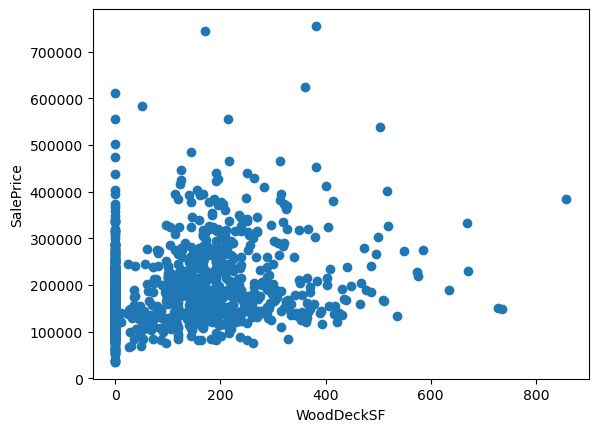

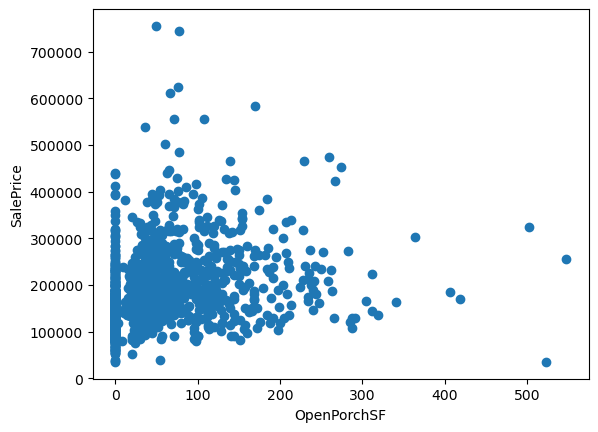

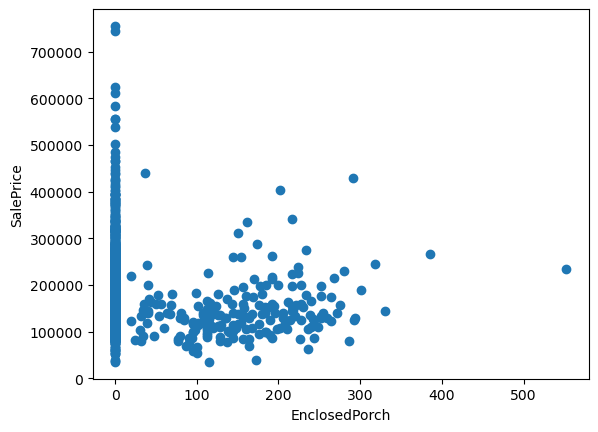

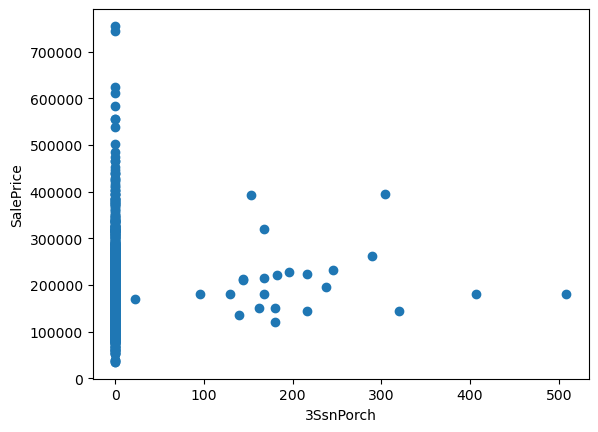

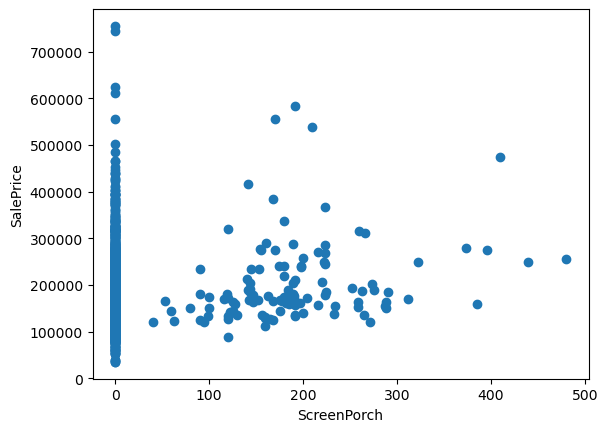

In [107]:
for col in ['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch']:
    plt.scatter(df_train[col],df_train['SalePrice'])
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.show()

In [108]:
df[df.EnclosedPorch > 500]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice,is_train
197,198,75,RL,174.0,25419,Pave,Reg,Lvl,AllPub,Corner,...,552,0,0,GdPrv,3,2006,WD,Abnorml,235000.0,1
2503,2504,50,RL,104.0,23920,Pave,Reg,Lvl,AllPub,Inside,...,1012,0,0,None,4,2007,WD,Normal,NaN,0
2567,2568,20,RL,68.0,25485,Pave,IR1,Lvl,AllPub,CulDSac,...,584,0,0,None,5,2007,WD,Normal,NaN,0


In [109]:
df.drop(index = df[(df['EnclosedPorch'] > 500) & (df.is_train == 1)].index, inplace=True)

# Creating new features

Creating column about total square footage

In [112]:
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

Creating column about total bathrooms

In [114]:
df['TotalBath'] = df['BsmtFullBath'] + 0.5 * df['BsmtHalfBath'] + df['FullBath'] + 0.5 * df['HalfBath']

Create age columns

In [116]:
df['HouseAge'] = 2025 - df['YearBuilt']
df['RemodelAge'] = 2025 - df['YearRemodAdd']
df['GarageAge'] = df['GarageYrBlt'].apply(lambda x: 2025 - x if x > 0 else 0)

Summing up all all porch-related columns

In [118]:
df['TotalPorchSF'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']

# Skew

We find right skewed columns ( skew > 0.75) and we apply log1p to reduce skewness

In [121]:
# Checking numerical contiuous columns for skewness
high_skewed_cols = []
num_continuous.append('TotalSF')
for col in num_continuous:
    if df[col].skew() > 0.75:
        high_skewed_cols.append(col)

Let's do some transformation to reduce skewness and make distribution more symetric

In [123]:
for col in high_skewed_cols:
    df[col] = df[col].apply(lambda x: np.log1p(x))

# Removing columns if there is no usage

In [125]:
df['MSSubClass'].value_counts().sort_values()

MSSubClass
150       1
40        6
180      17
45       18
75       22
85       48
190      60
90      109
80      118
70      128
160     128
30      139
120     182
50      287
60      574
20     1077
Name: count, dtype: int64

Looks okay t keep it

In [127]:
df['MSZoning'].value_counts().sort_values()

MSZoning
C (all)      25
RH           26
FV          139
RM          460
RL         2264
Name: count, dtype: int64

Looks okay to keep it

In [129]:
df['Street'].value_counts()

Street
Pave    2902
Grvl      12
Name: count, dtype: int64

Most of the observations are 'Pave' so we really don't have any information from this column, let's remove it

In [131]:
df.drop(columns = ['Street'], inplace = True)

In [132]:
df['LotShape'].value_counts()

LotShape
Reg    1858
IR1     967
IR2      75
IR3      14
Name: count, dtype: int64

In [133]:
df['LandContour'].value_counts()

LandContour
Lvl    2621
HLS     119
Bnk     115
Low      59
Name: count, dtype: int64

In [134]:
df['Utilities'].value_counts()

Utilities
AllPub    2913
NoSeWa       1
Name: count, dtype: int64

There's no really usage from this column, so let's remove it

In [136]:
df.drop(columns = ['Utilities'], inplace=True)

In [137]:
df['LotConfig'].value_counts()

LotConfig
Inside     2131
Corner      508
CulDSac     176
FR2          85
FR3          14
Name: count, dtype: int64

In [138]:
df['LandSlope'].value_counts()

LandSlope
Gtl    2776
Mod     123
Sev      15
Name: count, dtype: int64

In [139]:
df['Neighborhood'].value_counts()

Neighborhood
NAmes      441
CollgCr    267
OldTown    238
Edwards    193
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
NoRidge     71
Timber      71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: count, dtype: int64

In [140]:
df['Condition1'].value_counts()

Condition1
Norm      2510
Feedr      163
Artery      90
RRAn        50
PosN        39
RRAe        28
PosA        19
RRNn         9
RRNe         6
Name: count, dtype: int64

In [141]:
df['Condition2'].value_counts()

Condition2
Norm      2885
Feedr       13
Artery       4
PosN         4
PosA         4
RRNn         2
RRAn         1
RRAe         1
Name: count, dtype: int64

There's no usage from this column, let's remove it

In [143]:
df.drop(columns = ['Condition2'], inplace=True)

In [144]:
df['BldgType'].value_counts()

BldgType
1Fam      2421
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      61
Name: count, dtype: int64

In [145]:
df['HouseStyle'].value_counts()

HouseStyle
1Story    1469
2Story     869
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: count, dtype: int64

In [146]:
df['OverallQual'].value_counts()

OverallQual
5     825
6     731
7     598
8     341
4     226
9     107
3      39
10     30
2      13
1       4
Name: count, dtype: int64

In [147]:
df['OverallCond'].value_counts()

OverallCond
5    1642
6     531
7     389
8     144
4     100
3      50
9      41
2      10
1       7
Name: count, dtype: int64

In [148]:
df['RoofStyle'].value_counts()

RoofStyle
Gable      2308
Hip         549
Gambrel      22
Flat         19
Mansard      11
Shed          5
Name: count, dtype: int64

In [149]:
df['RoofMatl'].value_counts()

RoofMatl
CompShg    2873
Tar&Grv      22
WdShake       9
WdShngl       7
Metal         1
Membran       1
Roll          1
Name: count, dtype: int64

In [150]:
df.groupby('RoofMatl')['SalePrice'].median()

RoofMatl
CompShg    11.995358
Membran    12.394629
Metal      12.100718
Roll       11.827744
Tar&Grv    12.019731
WdShake    12.396697
WdShngl    12.701775
Name: SalePrice, dtype: float64

It;s okay to drop this column

In [152]:
df.drop(columns = ['RoofMatl'], inplace=True)

In [153]:
df['Exterior1st'].value_counts()

Exterior1st
VinylSd    1026
MetalSd     450
HdBoard     441
Wd Sdng     410
Plywood     221
CemntBd     126
BrkFace      86
WdShing      56
AsbShng      44
Stucco       41
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: count, dtype: int64

In [154]:
df['Exterior2nd'].value_counts()

Exterior2nd
VinylSd    1015
MetalSd     447
HdBoard     405
Wd Sdng     390
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      46
Stucco       45
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: count, dtype: int64

In [155]:
df['MasVnrType'].value_counts()

MasVnrType
None       1762
BrkFace     879
Stone       248
BrkCmn       25
Name: count, dtype: int64

In [156]:
df['ExterQual'].value_counts()

ExterQual
TA    1795
Gd     978
Ex     106
Fa      35
Name: count, dtype: int64

In [157]:
df['ExterCond'].value_counts()

ExterCond
TA    2534
Gd     298
Fa      67
Ex      12
Po       3
Name: count, dtype: int64

In [158]:
df['Foundation'].value_counts()

Foundation
PConc     1306
CBlock    1232
BrkTil     311
Slab        49
Stone       11
Wood         5
Name: count, dtype: int64

In [159]:
df['BsmtQual'].value_counts()

BsmtQual
TA      1282
Gd      1207
Ex       257
Fa        87
None      81
Name: count, dtype: int64

In [160]:
df['BsmtCond'].value_counts()

BsmtCond
TA      2601
Gd       122
Fa       104
None      82
Po         5
Name: count, dtype: int64

In [161]:
df['BsmtExposure'].value_counts()

BsmtExposure
No      1903
Av       418
Gd       273
Mn       238
None      82
Name: count, dtype: int64

In [162]:
df['BsmtFinType1'].value_counts()

BsmtFinType1
Unf     851
GLQ     846
ALQ     428
Rec     288
BLQ     268
LwQ     154
None     79
Name: count, dtype: int64

In [163]:
df['BsmtFinType2'].value_counts()

BsmtFinType2
Unf     2490
Rec      104
LwQ       86
None      80
BLQ       68
ALQ       52
GLQ       34
Name: count, dtype: int64

In [164]:
df['Heating'].value_counts()

Heating
GasA     2870
GasW       26
Grav        9
Wall        6
OthW        2
Floor       1
Name: count, dtype: int64

In [165]:
df.groupby('Heating')['SalePrice'].median()

Heating
Floor    11.191356
GasA     12.010672
GasW     11.804856
Grav     11.277216
OthW     11.741614
Wall     11.423433
Name: SalePrice, dtype: float64

It's okay to drop it

In [167]:
df.drop(columns=['Heating'], inplace=True)

In [168]:
df['HeatingQC'].value_counts()

HeatingQC
Ex    1491
TA     855
Gd     473
Fa      92
Po       3
Name: count, dtype: int64

In [169]:
df['CentralAir'].value_counts()

CentralAir
Y    2718
N     196
Name: count, dtype: int64

In [170]:
df.groupby('CentralAir')['SalePrice'].median()

CentralAir
N    11.492733
Y    12.031725
Name: SalePrice, dtype: float64

In [171]:
df['Electrical'].value_counts()

Electrical
SBrkr    2667
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: count, dtype: int64

In [172]:
df['KitchenQual'].value_counts()

KitchenQual
TA    1491
Gd    1149
Ex     204
Fa      70
Name: count, dtype: int64

In [173]:
df['Functional'].value_counts()

Functional
Typ     2714
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: count, dtype: int64

In [174]:
df['Fireplaces'].value_counts()

Fireplaces
0    1419
1    1266
2     218
3      10
4       1
Name: count, dtype: int64

In [175]:
df['FireplaceQu'].value_counts()

FireplaceQu
None    1419
Gd       741
TA       592
Fa        74
Po        46
Ex        42
Name: count, dtype: int64

In [176]:
df['GarageType'].value_counts()

GarageType
Attchd     1720
Detchd      776
BuiltIn     186
None        159
Basment      36
2Types       23
CarPort      14
Name: count, dtype: int64

In [177]:
df['GarageQual'].value_counts()

GarageQual
TA      2600
None     159
Fa       123
Gd        24
Po         5
Ex         3
Name: count, dtype: int64

In [178]:
df['GarageCond'].value_counts()

GarageCond
TA      2650
None     159
Fa        73
Gd        15
Po        14
Ex         3
Name: count, dtype: int64

In [179]:
df['PavedDrive'].value_counts()

PavedDrive
Y    2636
N     216
P      62
Name: count, dtype: int64

In [180]:
df['Fence'].value_counts()

Fence
None     2344
MnPrv     329
GdPrv     117
GdWo      112
MnWw       12
Name: count, dtype: int64

In [181]:
df['MoSold'].value_counts()

MoSold
6     502
7     446
5     394
4     279
8     232
3     231
10    173
9     158
11    141
2     133
1     121
12    104
Name: count, dtype: int64

In [182]:
df['SaleType'].value_counts()

SaleType
WD       2521
New       238
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Other       1
Name: count, dtype: int64

In [183]:
df['SaleCondition'].value_counts()

SaleCondition
Normal     2400
Partial     244
Abnorml     188
Family       46
Alloca       24
AdjLand      12
Name: count, dtype: int64

# Encoding

Let's make two lists of columns. One has order in classes, other one hasn't. 

In [186]:
cat_cols_ordinal = ['LotShape','LandContour','LotConfig','LandSlope',['ExterQual','ExterCond','HeatingQC','KitchenQual'],
                    ['BsmtQual','BsmtCond','FireplaceQu','GarageQual','GarageCond'],'BsmtExposure',['BsmtFinType1','BsmtFinType2'],'Functional',
                    'GarageFinish','Fence']

cat_cols_nominal = ['MSSubClass','MSZoning','Neighborhood','Condition1','HouseStyle','RoofStyle',
                    'Exterior1st','Exterior2nd','MasVnrType','Foundation','Electrical','GarageType',
                    'SaleType','SaleCondition','BldgType','CentralAir','PavedDrive']

## Ordinal variables

### LotShape

In [189]:
df.LotShape.value_counts()

LotShape
Reg    1858
IR1     967
IR2      75
IR3      14
Name: count, dtype: int64

In [190]:
lot_shape_order_categories = [['Reg','IR1','IR2','IR3']]
encoder = OrdinalEncoder(categories = lot_shape_order_categories )

df[['LotShape']] = encoder.fit_transform(df[['LotShape']])

### LandContour

In [192]:
df.LandContour.value_counts()

LandContour
Lvl    2621
HLS     119
Bnk     115
Low      59
Name: count, dtype: int64

In [193]:
land_contour_order_categories = [['Lvl','Bnk','HLS','Low']]
encoder = OrdinalEncoder(categories = land_contour_order_categories)

df[['LandContour']] = encoder.fit_transform(df[['LandContour']])

### LotConfiure

In [195]:
df.LotConfig.value_counts()

LotConfig
Inside     2131
Corner      508
CulDSac     176
FR2          85
FR3          14
Name: count, dtype: int64

In [196]:
lot_config_order_categories = [['Inside','Corner','CulDSac','FR2','FR3']]
encoder = OrdinalEncoder(categories = lot_config_order_categories)

df[['LotConfig']] = encoder.fit_transform(df[['LotConfig']])

### Land Slope

In [198]:
df.LandSlope.value_counts()

LandSlope
Gtl    2776
Mod     123
Sev      15
Name: count, dtype: int64

In [199]:
land_slope_order_categories = [['Gtl','Mod','Sev']]
encoder = OrdinalEncoder(categories = land_slope_order_categories)

df[['LandSlope']] = encoder.fit_transform(df[['LandSlope']])

### ExterQual, ExterCond, HeatingQC, KitchenQual

In [201]:
df.ExterQual.value_counts()

ExterQual
TA    1795
Gd     978
Ex     106
Fa      35
Name: count, dtype: int64

In [202]:
df.ExterCond.value_counts()

ExterCond
TA    2534
Gd     298
Fa      67
Ex      12
Po       3
Name: count, dtype: int64

In [203]:
df.HeatingQC.value_counts()

HeatingQC
Ex    1491
TA     855
Gd     473
Fa      92
Po       3
Name: count, dtype: int64

In [204]:
df.KitchenQual.value_counts()

KitchenQual
TA    1491
Gd    1149
Ex     204
Fa      70
Name: count, dtype: int64

In [205]:
order_categories = [['Po','Fa','TA','Gd','Ex']]  
encoder = OrdinalEncoder(categories = order_categories, handle_unknown = 'use_encoded_value', unknown_value = -1)

for col in ['ExterQual','ExterCond','HeatingQC','KitchenQual']:
    df[[col]] = encoder.fit_transform(df[[col]])

### BsmtQual, BsmtCond, FireplaceQu, GarageQual, GarageCond

In [207]:
df.BsmtQual.value_counts()

BsmtQual
TA      1282
Gd      1207
Ex       257
Fa        87
None      81
Name: count, dtype: int64

In [208]:
df.BsmtCond.value_counts()

BsmtCond
TA      2601
Gd       122
Fa       104
None      82
Po         5
Name: count, dtype: int64

In [209]:
df.FireplaceQu.value_counts()

FireplaceQu
None    1419
Gd       741
TA       592
Fa        74
Po        46
Ex        42
Name: count, dtype: int64

df.GarageQual.value_counts()

In [211]:
df.GarageCond.value_counts()

GarageCond
TA      2650
None     159
Fa        73
Gd        15
Po        14
Ex         3
Name: count, dtype: int64

In [212]:
order_categories = [['None','Po','Fa','TA','Gd','Ex']]  
encoder = OrdinalEncoder(categories = order_categories, handle_unknown = 'use_encoded_value', unknown_value = -1)

for col in ['BsmtQual','BsmtCond','FireplaceQu','GarageQual','GarageCond']:
    df[[col]] = encoder.fit_transform(df[[col]])

### BsmrExposure

In [214]:
df.BsmtExposure.value_counts()

BsmtExposure
No      1903
Av       418
Gd       273
Mn       238
None      82
Name: count, dtype: int64

In [215]:
bsmt_exposure_order_categories = [['None','No','Mn','Av','Gd']]
encoder = OrdinalEncoder(categories = bsmt_exposure_order_categories)

df[['BsmtExposure']] = encoder.fit_transform(df[['BsmtExposure']])

### BsmtFinType1, BsmtFinType2

In [217]:
df.BsmtFinType1.value_counts()

BsmtFinType1
Unf     851
GLQ     846
ALQ     428
Rec     288
BLQ     268
LwQ     154
None     79
Name: count, dtype: int64

In [218]:
df.BsmtFinType2.value_counts()

BsmtFinType2
Unf     2490
Rec      104
LwQ       86
None      80
BLQ       68
ALQ       52
GLQ       34
Name: count, dtype: int64

In [219]:
bsmt_fin_type_order_categories = [['None','Unf','LwQ','Rec','BLQ','ALQ','GLQ']]
encoder = OrdinalEncoder(categories = bsmt_fin_type_order_categories)

for col in ['BsmtFinType1','BsmtFinType2']:
    df[[col]] = encoder.fit_transform(df[[col]])

### Functional

In [221]:
df.Functional.value_counts()

Functional
Typ     2714
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: count, dtype: int64

In [222]:
functional_order_categories = [['Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ']]
encoder = OrdinalEncoder(categories = functional_order_categories)

df[['Functional']] = encoder.fit_transform(df[['Functional']])

### GarageFinish

In [224]:
df.GarageFinish.value_counts()

GarageFinish
Unf     1228
RFn      809
Fin      718
None     159
Name: count, dtype: int64

In [225]:
gar_fin_order_categories = [['None','Unf','RFn','Fin']]
encoder = OrdinalEncoder(categories = gar_fin_order_categories)

df[['GarageFinish']] = encoder.fit_transform(df[['GarageFinish']])

### Fence

In [227]:
df.Fence.value_counts()

Fence
None     2344
MnPrv     329
GdPrv     117
GdWo      112
MnWw       12
Name: count, dtype: int64

In [228]:
fence_order_categories = [['None','MnWw','GdWo','MnPrv','GdPrv']]
encoder = OrdinalEncoder(categories = fence_order_categories)

df[['Fence']] = encoder.fit_transform(df[['Fence']])

## Nominal variables

In [230]:
#Create instance 
encoder_nominal = OneHotEncoder(drop= 'first', sparse_output=False).set_output(transform='pandas')

In [231]:
#Apply OneHotEncoder to nnomilan columns
encoded_df = encoder_nominal.fit_transform(df[cat_cols_nominal])
#encoded_df.columns = encoder_nominal.get_feature_names_out(cat_cols_nominal)
df.drop(columns = cat_cols_nominal, inplace=True)
df = pd.concat([df, encoded_df], axis=1)

# Correlations

In [233]:
corr_matrix = df.corr()

Checking for highly correlated features to drop them

In [235]:
high_corr_features = corr_matrix[abs(corr_matrix) > 0.9]

Let's drop highly correlated columns (one of them)

In [237]:
to_drop = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i,j]) > 0.9:
            colname = corr_matrix.columns[i]
            to_drop.add(colname)
df.drop(columns = to_drop, inplace=True)

Checking correlations with target

In [239]:
target_corr = df.corr()['SalePrice'].sort_values(ascending=False)
target_corr

SalePrice            1.000000
OverallQual          0.819675
TotalSF              0.815059
GrLivArea            0.735734
ExterQual            0.683380
                       ...   
MSZoning_RM         -0.347807
GarageType_Detchd   -0.390619
is_train                  NaN
MSSubClass_150            NaN
SaleType_Other            NaN
Name: SalePrice, Length: 178, dtype: float64

In [240]:
nan_target_corr = target_corr[target_corr.isnull()]
nan_target_corr

is_train         NaN
MSSubClass_150   NaN
SaleType_Other   NaN
Name: SalePrice, dtype: float64

In [241]:
nan_target_corr_list = list(nan_target_corr.index)

In [242]:
low_target_corr = target_corr[abs(target_corr) < 0.1]
low_target_corr

Exterior1st_CemntBd     0.095174
MSSubClass_120          0.093643
Neighborhood_Crawfor    0.087543
Neighborhood_Gilbert    0.079513
Neighborhood_ClearCr    0.076012
                          ...   
HouseStyle_1Story      -0.078460
Exterior1st_BrkComm    -0.080455
PavedDrive_P           -0.095313
HouseStyle_SFoyer      -0.095938
MSSubClass_190         -0.099783
Name: SalePrice, Length: 82, dtype: float64

In [243]:
low_target_corr_list = list(low_target_corr.index)

In [244]:
low_corr_columns = nan_target_corr_list + low_target_corr_list

# Modeling

Let's define features and target

In [247]:
X = df[df.is_train == 1].drop(columns = low_corr_columns).drop(columns = 'SalePrice')
y = df[df.is_train == 1].SalePrice

In [248]:
X_kaggle_test = df[df.is_train == 0].drop(columns = low_corr_columns).drop(columns = 'SalePrice')

Validation set

In [250]:
validation_size = 0.2
seed=7
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = validation_size, random_state = seed)

In [251]:
num_folds = 10
scoring = 'neg_mean_squared_error'

## Evaluate Algorithms

Let's make a list of models

In [254]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('RIDGE', Ridge()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

Evaluate each model

In [256]:
results = []
results_list = []
for name, model in models:
    kfold = KFold(n_splits=num_folds,shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    results_list.append({'Model': name, 'Neg MSE': cv_results.mean(), 'Std': cv_results.std()})

results_df = pd.DataFrame(results_list)
results_df

,Model,Neg MSE,Std
0,LR,-0.016901,0.005752
1,LASSO,-0.055768,0.013180
2,RIDGE,-0.016776,0.005975
3,EN,-0.052359,0.012054
4,KNN,-0.060402,0.012246
5,CART,-0.045530,0.007690
6,SVR,-0.060552,0.012791


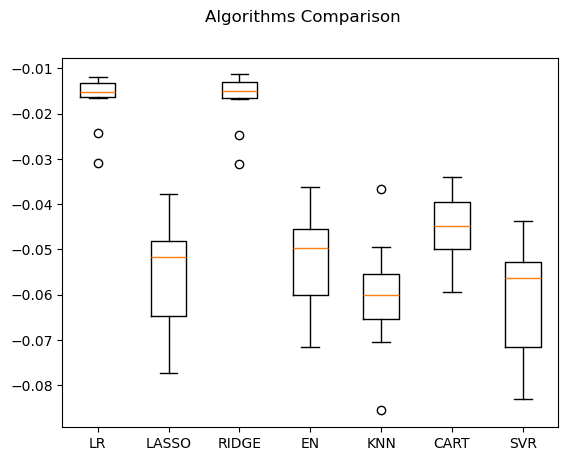

In [257]:
fig =plt.figure()
fig.suptitle('Algorithms Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(results_df.Model)
plt.show()

## Evaluate Algorithms: Standardization

Let's standardize continuous columns

In [260]:
cols = list(X.columns)

In [261]:
num_cols = num_continuous.copy()
for col in ['TotalSF','TotalBath','HouseAge','RemodelAge','garageAge','TotalPorchSF']:
    num_cols.append(col)

In [262]:
cols_to_stand = []
for col in num_cols:
    if col in cols:
        cols_to_stand.append(col)
cols_to_stand

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'TotalSF',
 'TotalSF',
 'TotalBath',
 'TotalPorchSF']

In [263]:
scaler = StandardScaler()

Let's standardize 

In [265]:
X_train_stand = X_train.copy()
X_valid_stand = X_valid.copy()
X_kaggle_test_stand = X_kaggle_test.copy()

In [266]:
X_train_stand[cols_to_stand] = scaler.fit_transform(X_train_stand[cols_to_stand])
X_valid_stand[cols_to_stand] = scaler.transform(X_valid_stand[cols_to_stand])
X_kaggle_test_stand[cols_to_stand] = scaler.transform(X_kaggle_test_stand[cols_to_stand])

Let's evaluate each model again

In [268]:
models_stand = []
models_stand.append(('LR_stand', LinearRegression()))
models_stand.append(('LASSO_stand', Lasso()))
models_stand.append(('RIDGE_stand', Ridge()))
models_stand.append(('EN_stand', ElasticNet()))
models_stand.append(('KNN_stand', KNeighborsRegressor()))
models_stand.append(('CART_stand', DecisionTreeRegressor()))
models_stand.append(('SVR_stand', SVR()))

In [269]:
stand_results = []
stand_results_list = []
for name, model in models_stand:
    kfold = KFold(n_splits=num_folds,shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_train_stand, y_train, cv=kfold, scoring=scoring)
    stand_results.append(cv_results)
    stand_results_list.append({'Model': name, 'Neg MSE': cv_results.mean(), 'Std': cv_results.std()})

stand_results_df = pd.DataFrame(stand_results_list)
results_df = pd.concat([results_df, stand_results_df], ignore_index=True)
stand_results_df

,Model,Neg MSE,Std
0,LR_stand,-0.016901,0.005752
1,LASSO_stand,-0.088991,0.016586
2,RIDGE_stand,-0.016805,0.005949
3,EN_stand,-0.087036,0.015024
4,KNN_stand,-0.045934,0.008315
5,CART_stand,-0.050582,0.009256
6,SVR_stand,-0.105383,0.020384


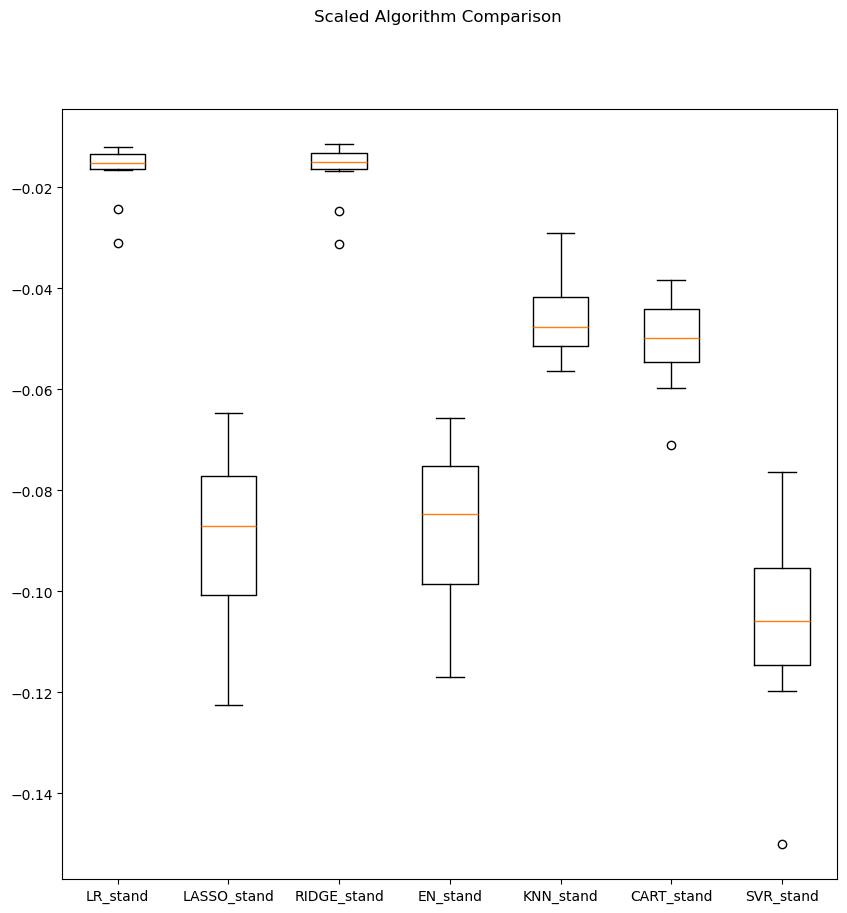

In [270]:
fig =plt.figure(figsize=(10,10))
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(stand_results)
ax.set_xticklabels(stand_results_df.Model)
plt.show()

## Evaluate Algorithms: Standardization, Ensembling methods

In [272]:
ensembles = []
ensembles.append(('ScaledAB', AdaBoostRegressor()))
ensembles.append(('ScaledGBM', GradientBoostingRegressor()))
ensembles.append(('ScaledRF', RandomForestRegressor()))
ensembles.append(('ScaledET', ExtraTreesRegressor()))

In [273]:
ensemble_results = []
stand_ensemble_results_list = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds,shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_train_stand, y_train, cv=kfold, scoring=scoring)
    ensemble_results.append(cv_results)
    stand_ensemble_results_list.append({'Model': name, 'Neg MSE': cv_results.mean(), 'Std': cv_results.std()})

stand_ensemble_results_df = pd.DataFrame(stand_ensemble_results_list)
results_df = pd.concat([results_df, stand_ensemble_results_df], ignore_index=True)

In [274]:
stand_ensemble_results_df

,Model,Neg MSE,Std
0,ScaledAB,-0.031251,0.006296
1,ScaledGBM,-0.019795,0.008136
2,ScaledRF,-0.022812,0.007738
3,ScaledET,-0.019424,0.006821


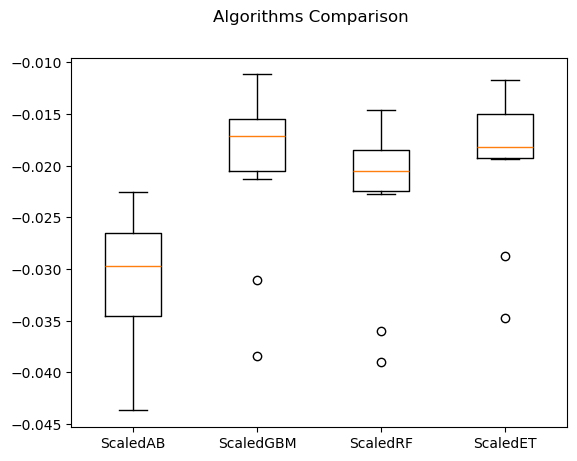

In [275]:
fig =plt.figure()
fig.suptitle('Algorithms Comparison')
ax = fig.add_subplot(111)
plt.boxplot(ensemble_results)
ax.set_xticklabels(stand_ensemble_results_df.Model)
plt.show()

In [276]:
results_df

,Model,Neg MSE,Std
0,LR,-0.016901,0.005752
1,LASSO,-0.055768,0.013180
2,RIDGE,-0.016776,0.005975
3,EN,-0.052359,0.012054
4,KNN,-0.060402,0.012246
5,CART,-0.045530,0.007690
6,SVR,-0.060552,0.012791
7,LR_stand,-0.016901,0.005752
8,LASSO_stand,-0.088991,0.016586
9,RIDGE_stand,-0.016805,0.005949


In [277]:
results_df[results_df['Neg MSE'] == results_df['Neg MSE'].max()]

,Model,Neg MSE,Std
2,RIDGE,-0.016776,0.005975


## Tuning Ridge

In [279]:
param_grid = dict(alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000])

In [280]:
Ridge = Ridge()

In [281]:
grid = GridSearchCV( Ridge, param_grid, cv = num_folds, scoring = scoring)

In [282]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='neg_mean_squared_error')

It's deafult value for alpha

In [284]:
grid.best_score_

-0.01715131107442599

In [285]:
model = grid.best_estimator_

# Finalize model

In [287]:
model.fit(X_train, y_train)

Ridge(alpha=1)

In [288]:
y_pred = model.predict(X_valid)

Evaluating:

In [290]:
print(np.sqrt(mean_squared_error(y_valid, y_pred)))

0.10750749858042853


# Let's predict our test data ( df.is_train == 0)

In [292]:
y_kaggle_test_predict = model.predict(X_kaggle_test)

In [293]:
SalePrice = pd.DataFrame({'SalePrice' : y_kaggle_test_predict})
SalePrice

,SalePrice
0,11.582334
1,12.004106
2,12.108060
3,12.179080
4,12.295687
...,...
1454,11.255232
1455,11.244230
1456,12.063668
1457,11.746973


In [294]:
Id = df[df.is_train == 0][['Id']].set_index(SalePrice.index)
Id

,Id
0,1461
1,1462
2,1463
3,1464
4,1465
...,...
1454,2915
1455,2916
1456,2917
1457,2918


In [295]:
df_to_submit = pd.concat([Id, SalePrice], axis=1)
df_to_submit

,Id,SalePrice
0,1461,11.582334
1,1462,12.004106
2,1463,12.108060
3,1464,12.179080
4,1465,12.295687
...,...,...
1454,2915,11.255232
1455,2916,11.244230
1456,2917,12.063668
1457,2918,11.746973


In [296]:
df_to_submit.to_csv('Submit.csv', index=False)